# Hotel Bookings

## Import Data & Libraries

In [105]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown

# Visualization imports
import plotly.express as px

In [106]:
# Import the Hotel Reservations dataset
booking_url = "https://docs.google.com/spreadsheets/d/1HqgL4jEcfvgj_xdVqpluRwWbliuscvkBiLdmsnVx7xg/edit?gid=1742145946#gid=1742145946"
booking_csv = booking_url.replace('/edit?gid=', '/export?format=csv&gid=')
df = pd.read_csv(booking_csv)
booking_df = df.copy()

booking_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preparation & Data Cleaning

### Looking into data type of each column and seeing if there is any null data

In [107]:
# Looking into each column data type and null data
booking_df.info()

# There is no null data and need to convert booking_status column into boolean and arrival_year, arrival_month, and arrival_date into datetime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There is no missing value / null

### Duplicated Data

In [108]:
# Checking if there is any duplicated Booking ID
booking_df[booking_df['Booking_ID'].duplicated() == True]

# There is no duplicated Booking ID

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### Arrival Date, Month, and Year

In [109]:
# Converting arrival date, month, and year into one date-time column
booking_df['arrival_time'] = pd.to_datetime(dict(
    year=booking_df['arrival_year'],
    month=booking_df['arrival_month'],
    day=1))

booking_df[['arrival_year', 'arrival_month', 'arrival_date', 'arrival_time']]

,arrival_year,arrival_month,arrival_date,arrival_time
0,2017,10,2,2017-10-01
1,2018,11,6,2018-11-01
2,2018,2,28,2018-02-01
3,2018,5,20,2018-05-01
4,2018,4,11,2018-04-01
...,...,...,...,...
36270,2018,8,3,2018-08-01
36271,2018,10,17,2018-10-01
36272,2018,7,1,2018-07-01
36273,2018,4,21,2018-04-01


In [110]:
# Looking at the data that has been added with the date column that has been transformed into datetime type
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

### Target feature conversion into Boolean data type

In [111]:
# Converting booking status column data type into boolean, as the booking status describing whether or not the booking is cancelled
booking_df['cancellation_status'] = booking_df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1}).astype(int)
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

/tmp/ipython-input-3101482177.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  booking_df['cancellation_status'] = booking_df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1}).astype(int)


## Understand the Dataset & Table Relationship

### Numerical Columns

In [112]:
# checking the numerical feature statistic description
booking_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_time,cancellation_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,2018-05-10 00:13:25.050310400,0.327636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-01 00:00:00,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-01 00:00:00,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-01 00:00:00,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-01 00:00:00,1.000000
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,NaN,0.469358


<Axes: >

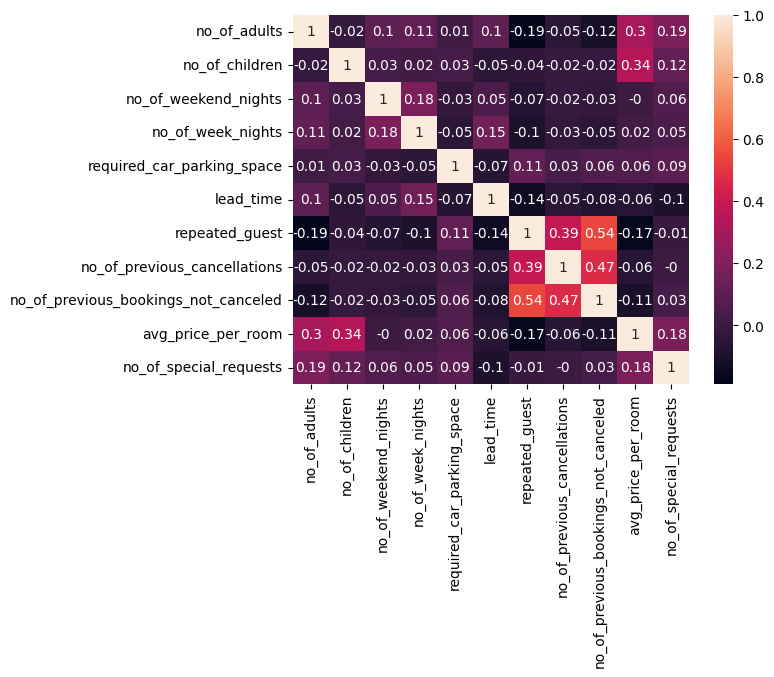

In [113]:
# Looking at the numerical features correlation coefficient with each other
features_num = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

book_corr = round(booking_df[features_num].corr(), 2)
sns.heatmap(book_corr, annot=True)

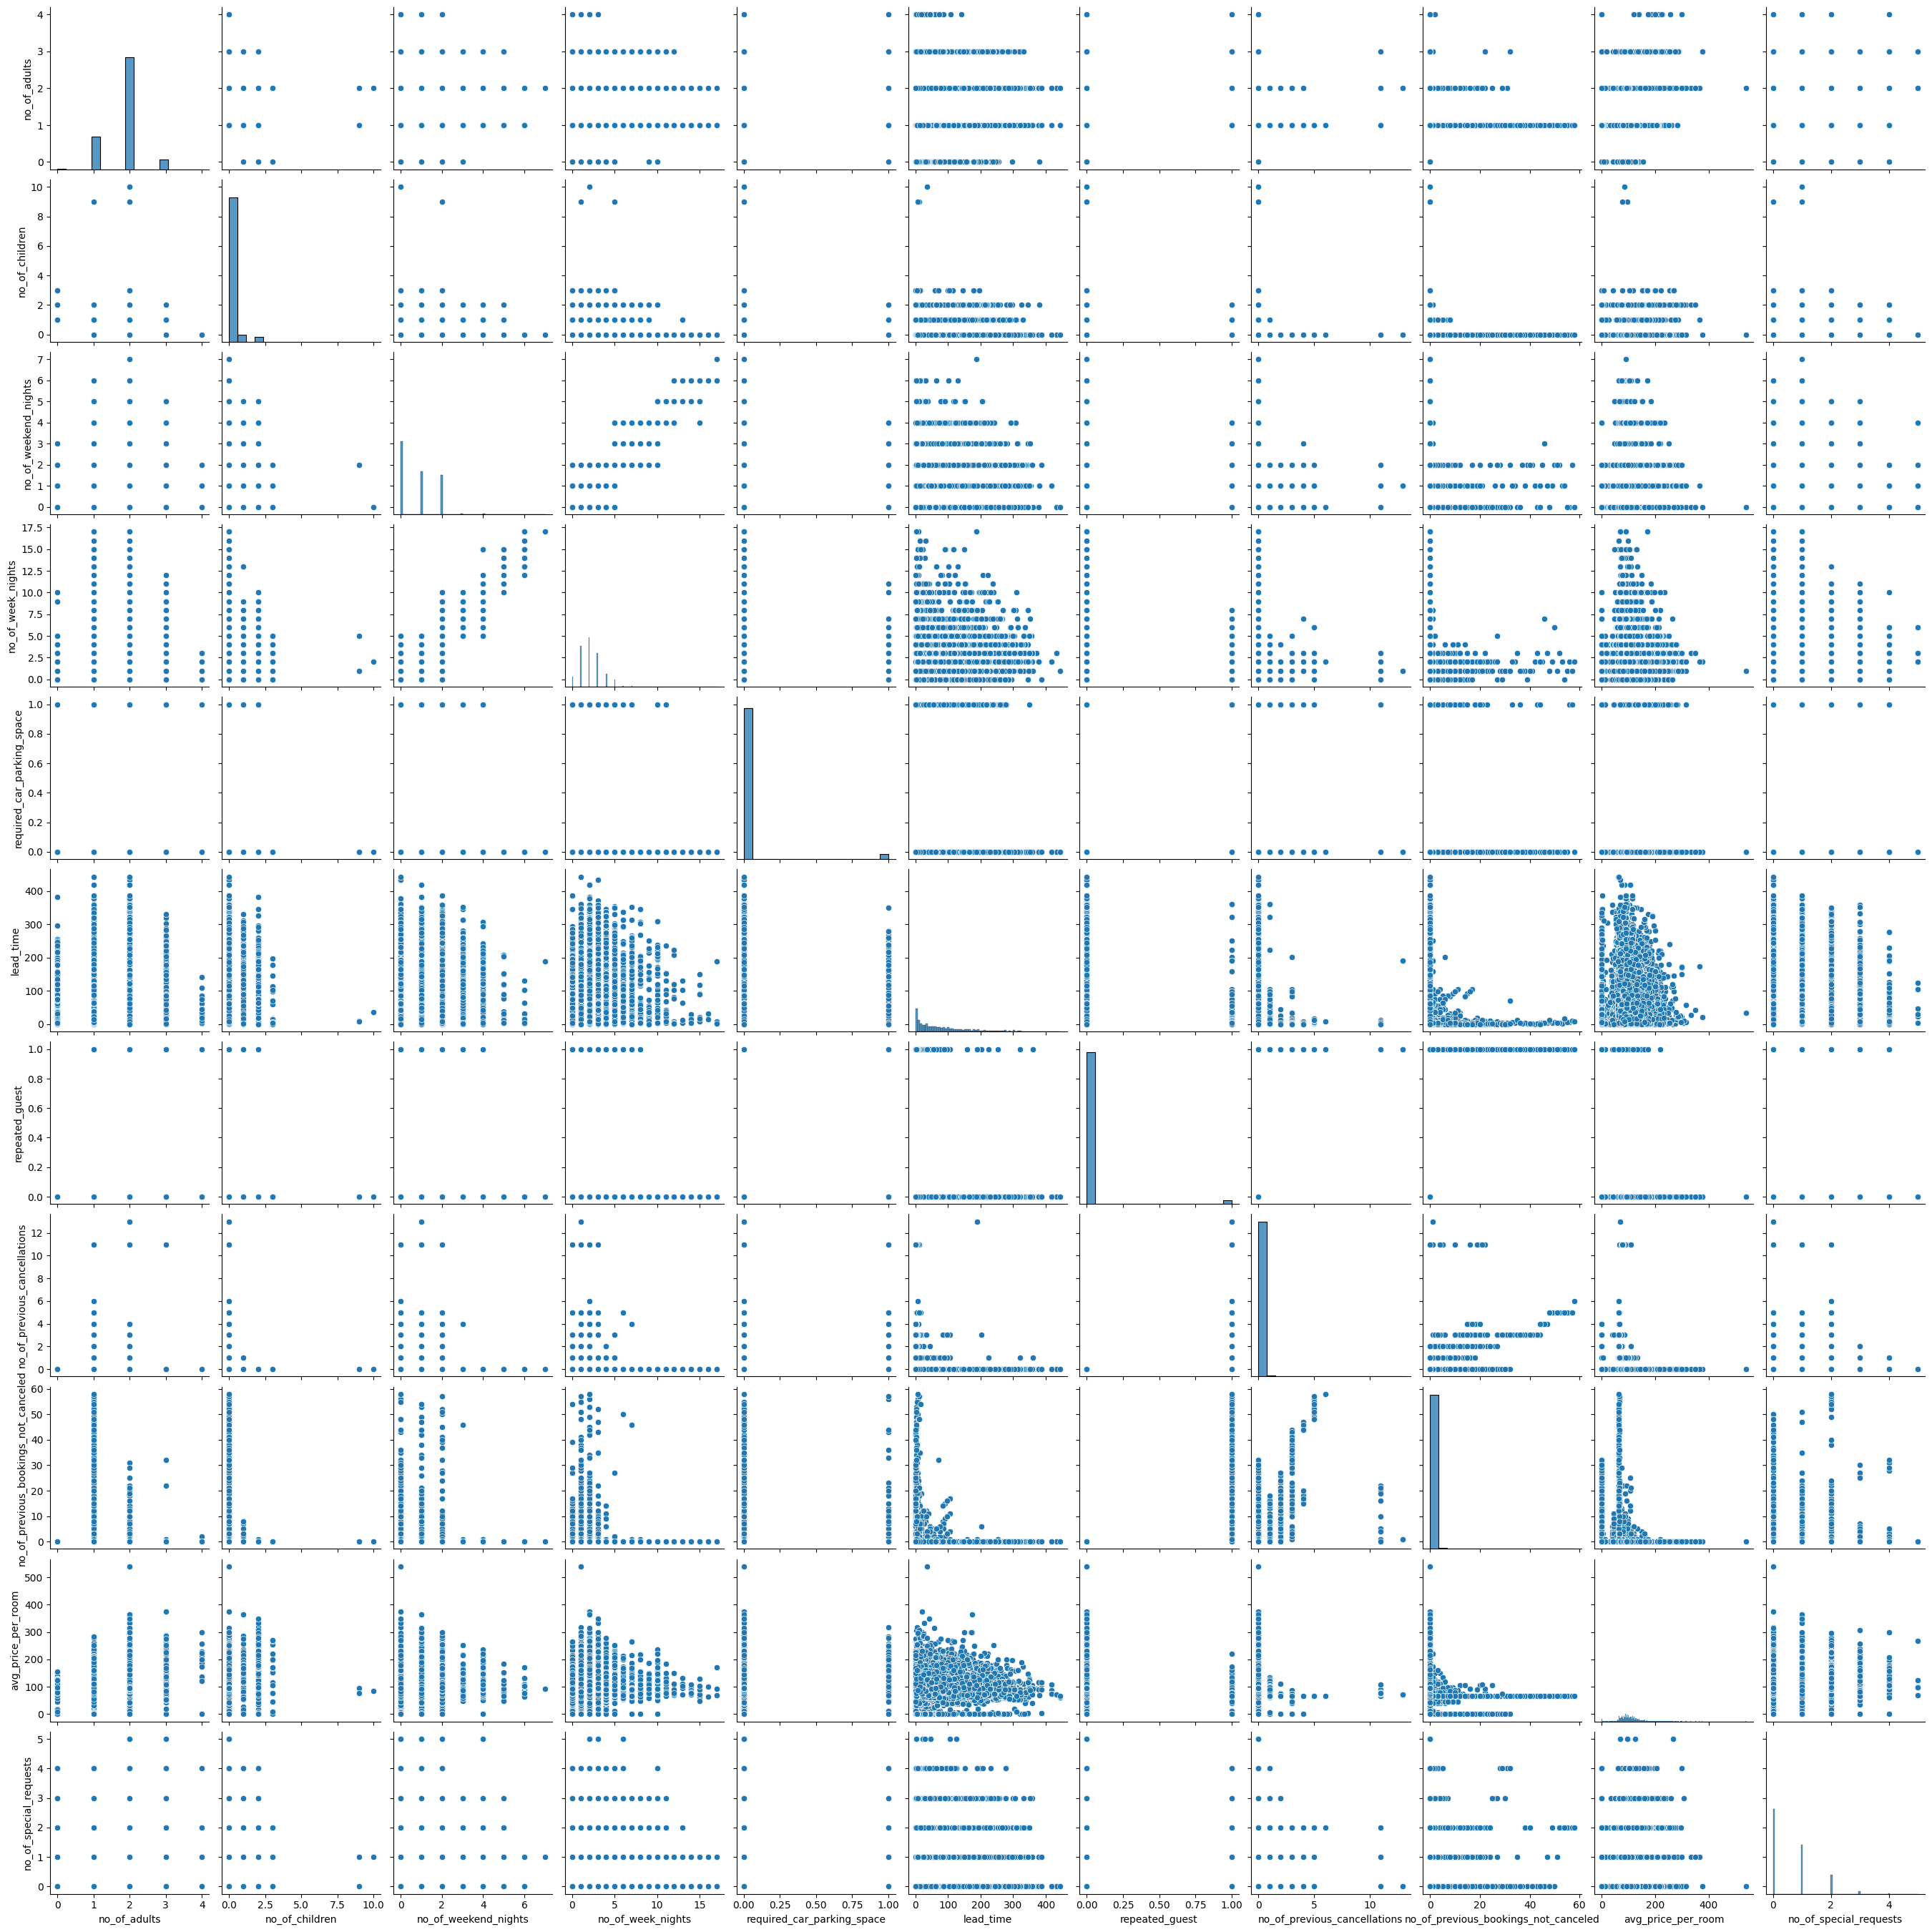

In [114]:
# Looking at the relationship of the numerical features
sns.pairplot(booking_df[features_num])

### Categorical Columns

In [115]:
# Listing categorical features
features_cat = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Looking at the description of each categorical features
booking_df[features_cat].describe()

,type_of_meal_plan,room_type_reserved,market_segment_type
count,36275,36275,36275
unique,4,7,5
top,Meal Plan 1,Room_Type 1,Online
freq,27835,28130,23214


In [116]:
# Proportion of the categorical feature Type of Meal Plan
booking_df['type_of_meal_plan'].value_counts(normalize=True)

,proportion
type_of_meal_plan,
Meal Plan 1,0.767333
Not Selected,0.141420
Meal Plan 2,0.091110
Meal Plan 3,0.000138


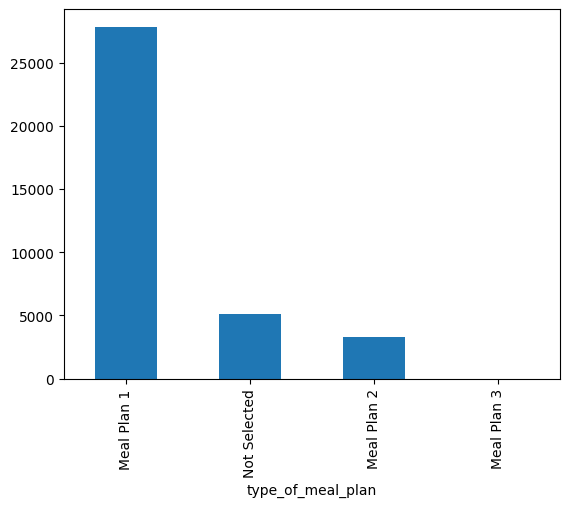

In [117]:
# Value counts of the categorical feature Type of Meal Plan
booking_df['type_of_meal_plan'].value_counts().plot(kind='bar')
plt.show()

In [118]:
# Proportion of the categorical feature Room Type Reserved
booking_df['room_type_reserved'].value_counts(normalize=True)

,proportion
room_type_reserved,
Room_Type 1,0.775465
Room_Type 4,0.166975
Room_Type 6,0.026630
Room_Type 2,0.019076
Room_Type 5,0.007305
Room_Type 7,0.004356
Room_Type 3,0.000193


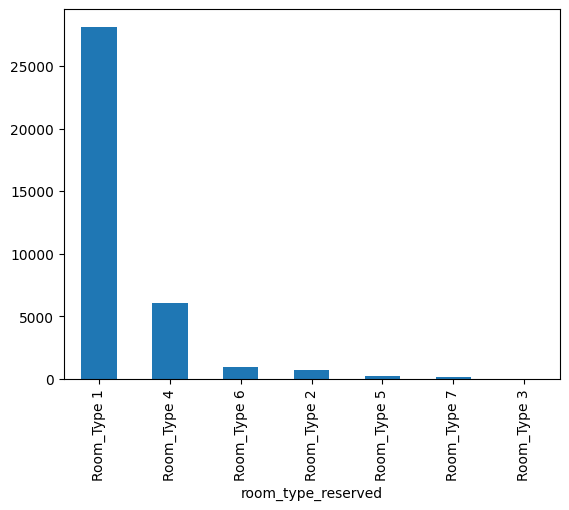

In [119]:
# Value counts of the categorical feature Room Type Reserved
booking_df['room_type_reserved'].value_counts().plot(kind='bar')
plt.show()

In [120]:
# Proportion of the categorical feature Market Segment Type
booking_df['market_segment_type'].value_counts(normalize=True)

,proportion
market_segment_type,
Online,0.639945
Offline,0.290227
Corporate,0.055603
Complementary,0.010779
Aviation,0.003446


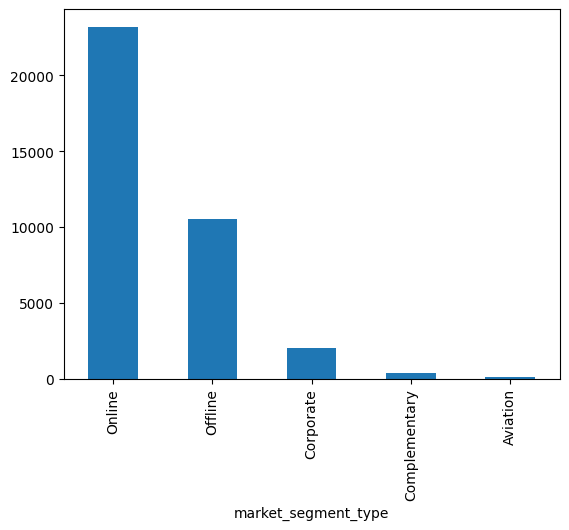

In [121]:
# Value counts of the categorical feature Market Segment Type
booking_df['market_segment_type'].value_counts().plot(kind='bar')
plt.show()

In [122]:
# Mean score summary for each numerical features
features_num_cancellation_mean = round(booking_df[features_num].mean(), 2)
features_num_cancellation_mean

,0
no_of_adults,1.84
no_of_children,0.11
no_of_weekend_nights,0.81
no_of_week_nights,2.20
required_car_parking_space,0.03
lead_time,85.23
repeated_guest,0.03
no_of_previous_cancellations,0.02
no_of_previous_bookings_not_canceled,0.15
avg_price_per_room,103.42


## Exploratory Data Analysis

### Revenue

In [123]:
# Cancelled Booking
booking_cancelled = booking_df[booking_df['booking_status'] == 'Canceled']

# Not Canceled Booking
booking_not_cancelled = booking_df[booking_df['booking_status'] == 'Not_Canceled']
booking_not_cancelled.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_time,cancellation_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-01,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-01,0
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,...,15,Online,0,0,0,107.55,1,Not_Canceled,2017-10-01,0
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,26,Online,0,0,0,105.61,1,Not_Canceled,2018-12-01,0
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,...,6,Offline,0,0,0,96.90,1,Not_Canceled,2018-07-01,0


In [124]:
# Revenue in 2018
booking_not_cancelled_2018 = booking_not_cancelled[booking_not_cancelled['arrival_year'] == 2018]
revenue_2018 = sum(booking_not_cancelled_2018['avg_price_per_room'] * ((booking_not_cancelled_2018['no_of_week_nights'] + booking_not_cancelled_2018['no_of_weekend_nights'])))
(print(f"Revenue in 2018: ${round(revenue_2018, 2)}"))

# Revenue Loss
booking_cancelled_2018 = booking_cancelled[booking_cancelled['arrival_year'] == 2018]
revenue_loss_2018 = sum(booking_cancelled_2018 ['avg_price_per_room'] * ((booking_cancelled_2018 ['no_of_week_nights'] + booking_cancelled_2018 ['no_of_weekend_nights'])))
(print(f"Revenue Loss in 2018: ${round(revenue_loss_2018, 2)}"))

Revenue in 2018: $5668855.39
Revenue Loss in 2018: $4021739.8


### Cancellation Rate

In [125]:
# Overall Cancellation Rate
cancellation_rate = booking_cancelled['Booking_ID'].nunique() / booking_df['Booking_ID'].nunique()
print(f"Cancellation Rate: {round(cancellation_rate, 4) * 100}{'%'}")

# Cancellation Rate in 2017
cancellation_rate_2017 = (booking_cancelled[booking_cancelled['arrival_year'] == 2017]['Booking_ID'].nunique()) / (booking_df[booking_df['arrival_year'] == 2017]['Booking_ID'].nunique())
print(f"Cancellation Rate in 2017: {round(cancellation_rate_2017, 4) * 100}{'%'}")

# Cancellation Rate in 2018
cancellation_rate_2018 = (booking_cancelled[booking_cancelled['arrival_year'] == 2018]['Booking_ID'].nunique()) / (booking_df[booking_df['arrival_year'] == 2018]['Booking_ID'].nunique())
print(f"Cancellation Rate in 2018: {round(cancellation_rate_2018, 4) * 100}{'%'}")

Cancellation Rate: 32.76%
Cancellation Rate in 2017: 14.75%
Cancellation Rate in 2018: 36.71%


In [126]:
# Checking the number of monthly booking
monthly_booking = booking_df.groupby('arrival_time')['Booking_ID'].nunique()
monthly_booking = monthly_booking.sort_index()
monthly_booking

,Booking_ID
arrival_time,
2017-07-01,363
2017-08-01,1014
2017-09-01,1649
2017-10-01,1913
2017-11-01,647
2017-12-01,928
2018-01-01,1014
2018-02-01,1704
2018-03-01,2358


<Axes: xlabel='arrival_time'>

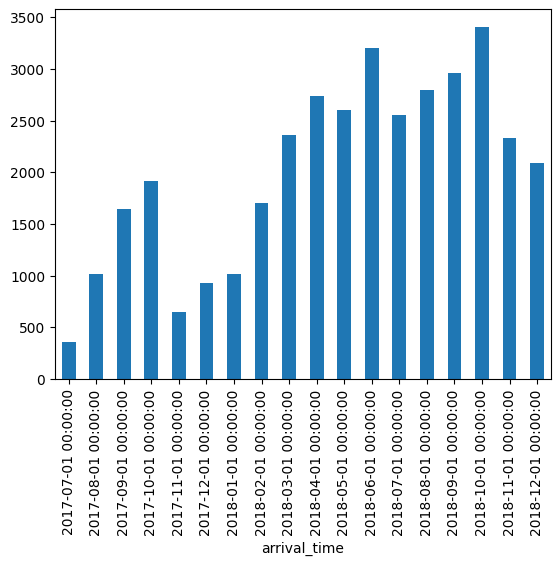

In [127]:
# Monthly booking counts
monthly_booking.plot(kind='bar')

In [128]:
# Seeing the monthly Cancellation count
monthly_cancellation_count = booking_cancelled.groupby('arrival_time')['Booking_ID'].nunique()
monthly_cancellation_count

,Booking_ID
arrival_time,
2017-07-01,243
2017-08-01,185
2017-09-01,182
2017-10-01,302
2017-11-01,27
2017-12-01,22
2018-01-01,24
2018-02-01,430
2018-03-01,700


In [129]:
# Seeing the monthly Cancellation Rate
monthly_cancellation_rate = booking_cancelled.groupby('arrival_time')['Booking_ID'].nunique() / booking_df.groupby('arrival_time')['Booking_ID'].nunique()

monthly_cancellation_rate

,Booking_ID
arrival_time,
2017-07-01,0.669421
2017-08-01,0.182446
2017-09-01,0.110370
2017-10-01,0.157867
2017-11-01,0.041731
2017-12-01,0.023707
2018-01-01,0.023669
2018-02-01,0.252347
2018-03-01,0.296862


<Axes: xlabel='arrival_time'>

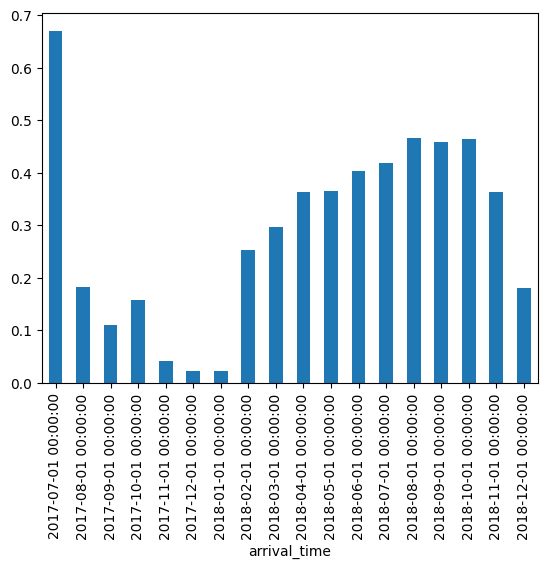

In [130]:
# Monthly cancellation rate
monthly_cancellation_rate.plot(kind='bar')

### Categorical data comparison between Canceled bookings and Non-Canceled bookings

In [131]:
# Looking at the difference of type of meal plan between Canceled bookings and Non-Canceled bookings
type_of_meal_plan_diff = round(pd.crosstab(booking_df['type_of_meal_plan'], booking_df['booking_status'], normalize='columns'), 2)
type_of_meal_plan_diff["Diff"] = type_of_meal_plan_diff['Canceled'] - type_of_meal_plan_diff['Not_Canceled']
type_of_meal_plan_diff

booking_status,Canceled,Not_Canceled,Diff
type_of_meal_plan,,,
Meal Plan 1,0.73,0.79,-0.06
Meal Plan 2,0.13,0.07,0.06
Meal Plan 3,0.00,0.00,0.00
Not Selected,0.14,0.14,0.00


In [132]:
# Looking at the difference of type of room reserved between Canceled bookings and Non-Canceled bookings
room_type_reserved_diff = round(pd.crosstab(booking_df['room_type_reserved'], booking_df['booking_status'], normalize='columns'), 2)
room_type_reserved_diff["Diff"] = room_type_reserved_diff["Canceled"] - room_type_reserved_diff["Not_Canceled"]
room_type_reserved_diff

booking_status,Canceled,Not_Canceled,Diff
room_type_reserved,,,
Room_Type 1,0.76,0.78,-0.02
Room_Type 2,0.02,0.02,0.00
Room_Type 3,0.00,0.00,0.00
Room_Type 4,0.17,0.16,0.01
Room_Type 5,0.01,0.01,0.00
Room_Type 6,0.03,0.02,0.01
Room_Type 7,0.00,0.01,-0.01


In [133]:
# Looking at the difference of market segment type plan between Canceled bookings and Non-Canceled bookings
market_segment_diff = round(pd.crosstab(booking_df['market_segment_type'], booking_df['booking_status'], normalize='columns'), 2)
market_segment_diff["Diff"] = market_segment_diff["Canceled"] - market_segment_diff["Not_Canceled"]
market_segment_diff

booking_status,Canceled,Not_Canceled,Diff
market_segment_type,,,
Aviation,0.00,0.00,0.00
Complementary,0.00,0.02,-0.02
Corporate,0.02,0.07,-0.05
Offline,0.27,0.30,-0.03
Online,0.71,0.60,0.11


In [134]:
# Looking at the difference of market segment type plan between Canceled bookings and Non-Canceled bookings
market_segment_diff_2 = round(pd.crosstab(booking_df['booking_status'], booking_df['market_segment_type'], normalize='columns'), 2)
market_segment_diff_2

market_segment_type,Aviation,Complementary,Corporate,Offline,Online
booking_status,,,,,
Canceled,0.3,0.0,0.11,0.3,0.37
Not_Canceled,0.7,1.0,0.89,0.7,0.63


In [135]:
# Looking at the difference of arrival month between Canceled bookings and Non-Canceled bookings
arrival_month_diff = round(pd.crosstab(booking_df['arrival_month'], booking_df['booking_status'], normalize='columns'), 2)
arrival_month_diff["Diff"] = arrival_month_diff["Canceled"] - arrival_month_diff["Not_Canceled"]
arrival_month_diff

booking_status,Canceled,Not_Canceled,Diff
arrival_month,,,
1,0.00,0.04,-0.04
2,0.04,0.05,-0.01
3,0.06,0.07,-0.01
4,0.08,0.07,0.01
5,0.08,0.07,0.01
6,0.11,0.08,0.03
7,0.11,0.07,0.04
8,0.13,0.10,0.03
9,0.13,0.13,0.00


### Numerical data comparison between Canceled bookings and Non-Canceled bookings

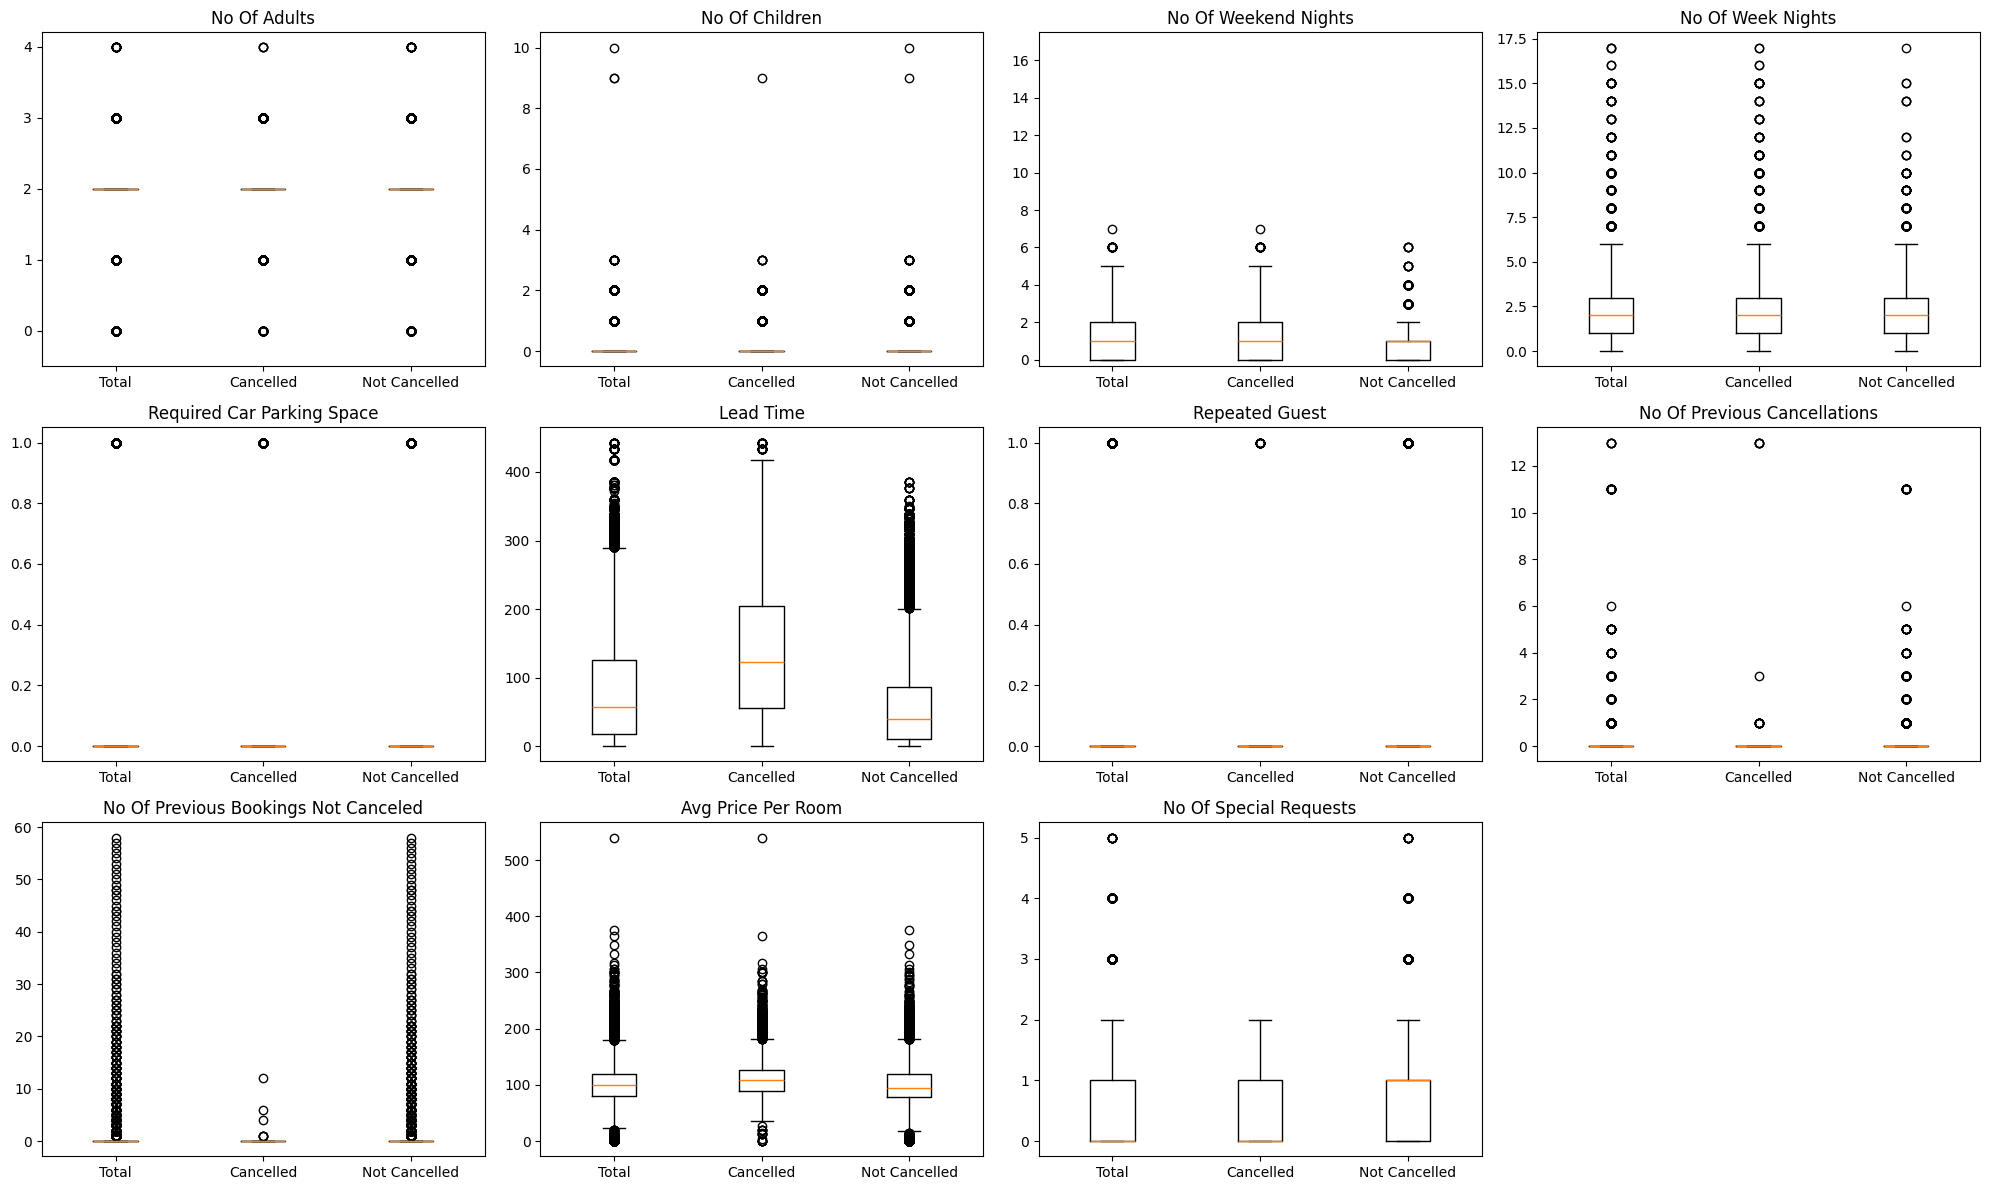

In [136]:
# Create boxplots for all numerical features, comparing canceled and non-canceled bookings

# Determine the number of rows and columns for subplots
num_features = len(features_num)
num_cols = 4  # You can adjust this as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, feature in enumerate(features_num):
    ax = axes[i]
    ax.boxplot([booking_df[feature], booking_cancelled[feature], booking_not_cancelled[feature]])
    ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])
    ax.set_title(f'{feature.replace("_", " ").title()}')

    # Set y-axis limit for 'no_of_weekend_nights' specifically if needed
    if feature == 'no_of_weekend_nights':
        ax.set_ylim(top=17.5) # Set dynamically for the feature
    elif feature == 'no_of_adults':
        ax.set_ylim(bottom=-0.5) # Example: to ensure 0 is visible and not cut
    elif feature == 'no_of_children':
        ax.set_ylim(bottom=-0.5) # Example: to ensure 0 is visible and not cut

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [137]:
# Looking at mean score difference of numerical features between Canceled bookings and Non-Canceled bookings
features_num_mean_diff = round(booking_df.groupby('cancellation_status')[features_num].mean(), 2)
features_num_mean_diff = features_num_mean_diff.transpose()
features_num_mean_diff['Diff'] = features_num_mean_diff[1] - features_num_mean_diff[0]
features_num_mean_diff

cancellation_status,0,1,Diff
no_of_adults,1.81,1.91,0.10
no_of_children,0.10,0.12,0.02
no_of_weekend_nights,0.77,0.89,0.12
no_of_week_nights,2.11,2.39,0.28
required_car_parking_space,0.04,0.01,-0.03
lead_time,58.93,139.22,80.29
repeated_guest,0.04,0.00,-0.04
no_of_previous_cancellations,0.03,0.01,-0.02
no_of_previous_bookings_not_canceled,0.23,0.00,-0.23
avg_price_per_room,99.93,110.59,10.66


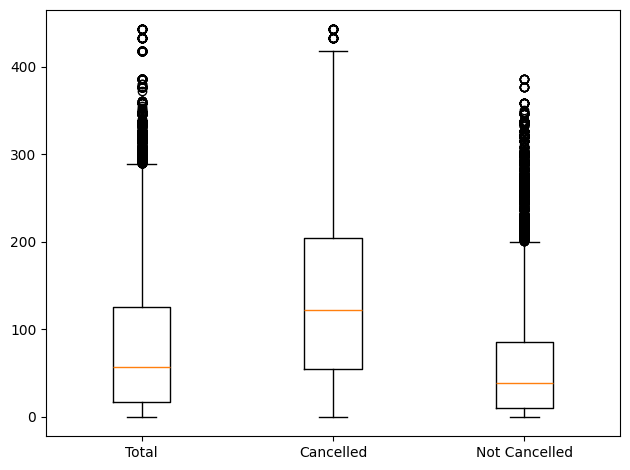

In [138]:
# Create boxplots for Lead Time
fig, ax = plt.subplots()
ax.boxplot([booking_df['lead_time'], booking_cancelled['lead_time'], booking_not_cancelled['lead_time']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

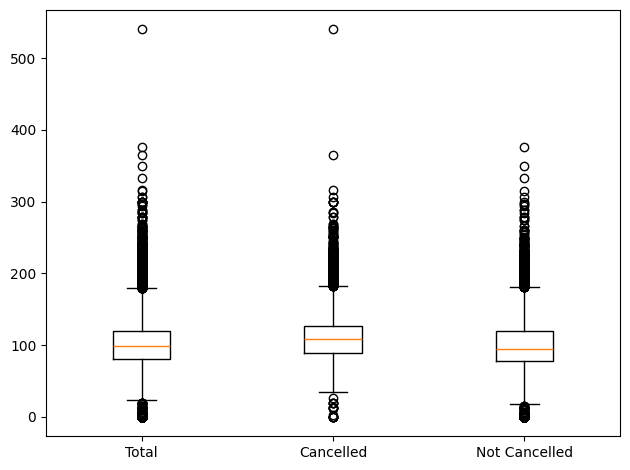

In [139]:
# Create boxplots for Avg. Price per Room
fig, ax = plt.subplots()
ax.boxplot([booking_df['avg_price_per_room'], booking_cancelled['avg_price_per_room'], booking_not_cancelled['avg_price_per_room']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

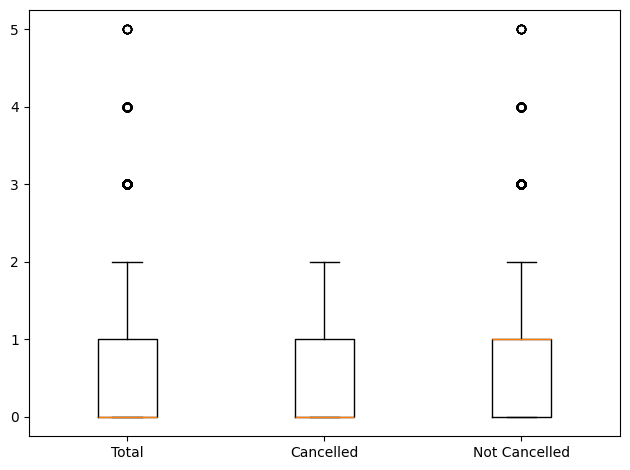

In [140]:
# Create boxplots for No. of Special Request
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_special_requests'], booking_cancelled['no_of_special_requests'], booking_not_cancelled['no_of_special_requests']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

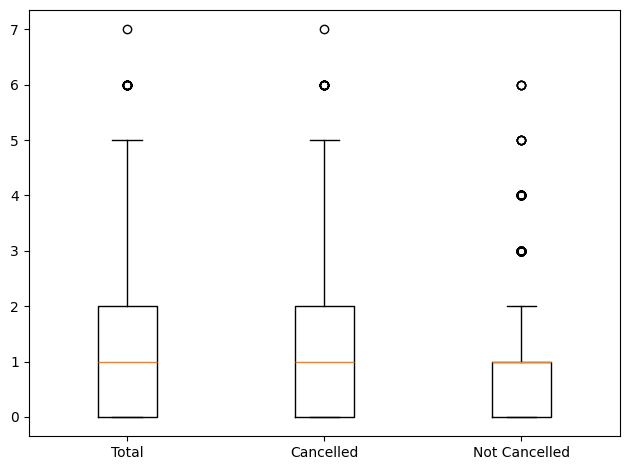

In [141]:
# Create boxplots for No. of Weekend Nights
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_weekend_nights'], booking_cancelled['no_of_weekend_nights'], booking_not_cancelled['no_of_weekend_nights']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

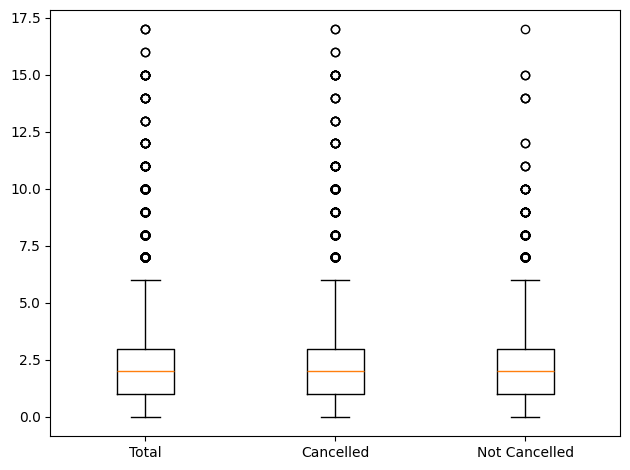

In [142]:
# Create boxplots for No. of Weekday Nights
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_week_nights'], booking_cancelled['no_of_week_nights'], booking_not_cancelled['no_of_week_nights']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

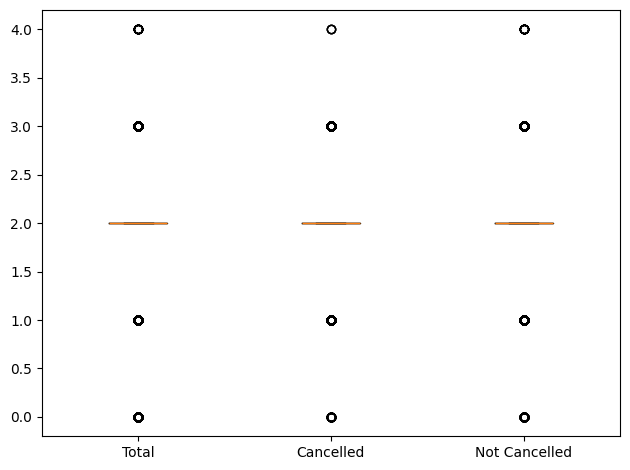

In [143]:
# Create boxplots for No. of Adults
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_adults'], booking_cancelled['no_of_adults'], booking_not_cancelled['no_of_adults']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

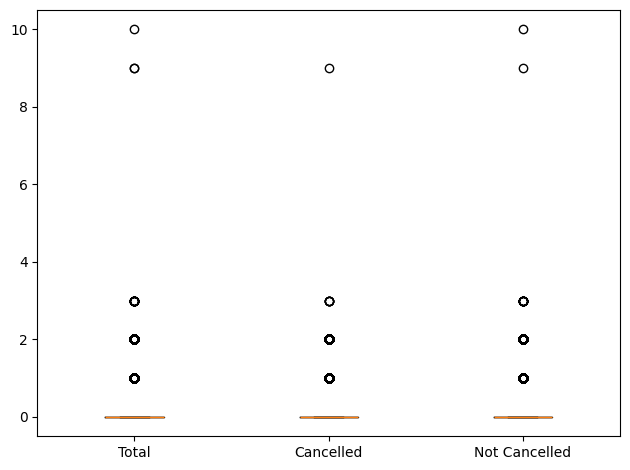

In [144]:
# Create boxplots for No. of Children
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_children'], booking_cancelled['no_of_children'], booking_not_cancelled['no_of_children']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

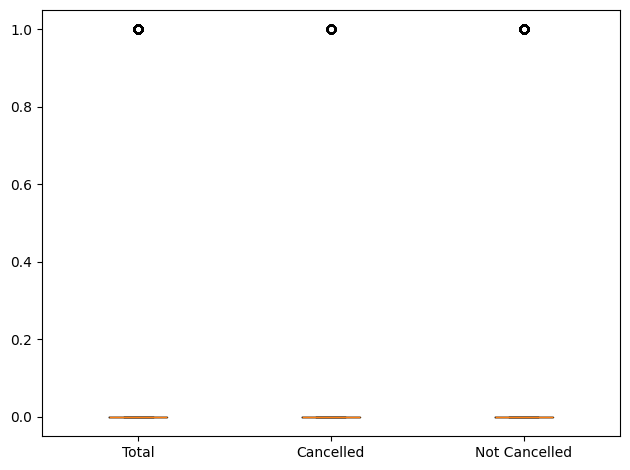

In [145]:
# Create boxplots for No. of Required Car Parking
fig, ax = plt.subplots()
ax.boxplot([booking_df['required_car_parking_space'], booking_cancelled['required_car_parking_space'], booking_not_cancelled['required_car_parking_space']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

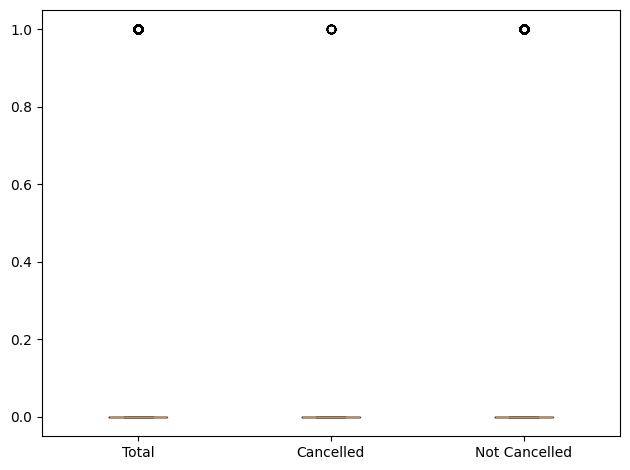

In [146]:
# Create boxplots for Repeated Guest
fig, ax = plt.subplots()
ax.boxplot([booking_df['repeated_guest'], booking_cancelled['repeated_guest'], booking_not_cancelled['repeated_guest']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

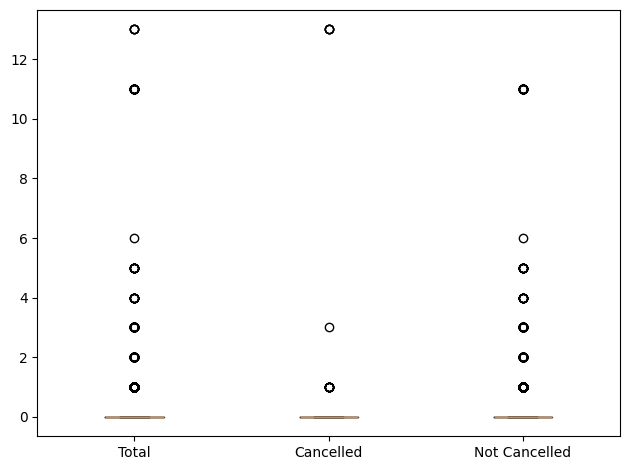

In [147]:
# Create boxplots for No. of Previous Cancellations
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_previous_cancellations'], booking_cancelled['no_of_previous_cancellations'], booking_not_cancelled['no_of_previous_cancellations']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

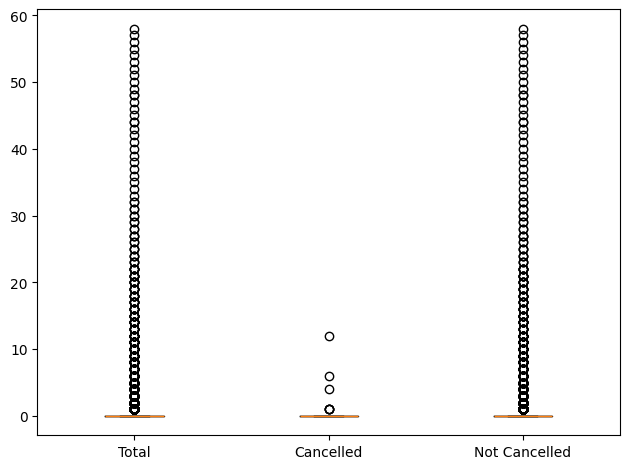

In [148]:
# Create boxplots for No. of Previous Cancellations
fig, ax = plt.subplots()
ax.boxplot([booking_df['no_of_previous_bookings_not_canceled'], booking_cancelled['no_of_previous_bookings_not_canceled'], booking_not_cancelled['no_of_previous_bookings_not_canceled']])
ax.set_xticklabels(['Total', 'Cancelled', 'Not Cancelled'])

plt.tight_layout()
plt.show()

In [149]:
# Mean score for each numerical features
features_num_cancellation_mean = round(booking_df[features_num].mean(), 2)
features_num_cancellation_mean

,0
no_of_adults,1.84
no_of_children,0.11
no_of_weekend_nights,0.81
no_of_week_nights,2.20
required_car_parking_space,0.03
lead_time,85.23
repeated_guest,0.03
no_of_previous_cancellations,0.02
no_of_previous_bookings_not_canceled,0.15
avg_price_per_room,103.42


## Statistical Analysis & Visualizations

### Hypothesis Testing

In [150]:
# Import library for hypothesis testing using scipy
from scipy.stats import chi2_contingency # for chi-square test
from scipy.stats import ttest_ind # for t-test
!pip install pingouin
import pingouin

#### Online Booking

In [151]:
# Creating boolean column of online booking if the customer booked via online
copy_booking_df = booking_df.copy()
online_booking_df = pd.get_dummies(booking_df['market_segment_type'], dtype=bool)
copy_online_booking_df = pd.concat((copy_booking_df, online_booking_df), axis=1)
copy_online_booking_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,avg_price_per_room,no_of_special_requests,booking_status,arrival_time,cancellation_status,Aviation,Complementary,Corporate,Offline,Online
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,65.00,0,Not_Canceled,2017-10-01,0,False,False,False,True,False
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,106.68,1,Not_Canceled,2018-11-01,0,False,False,False,False,True
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,60.00,0,Canceled,2018-02-01,1,False,False,False,False,True
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,100.00,0,Canceled,2018-05-01,1,False,False,False,False,True
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,94.50,0,Canceled,2018-04-01,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,167.80,1,Not_Canceled,2018-08-01,0,False,False,False,False,True
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,90.95,2,Canceled,2018-10-01,1,False,False,False,False,True
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,98.39,2,Not_Canceled,2018-07-01,0,False,False,False,False,True
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,94.50,0,Canceled,2018-04-01,1,False,False,False,False,True


In [152]:
# Online booking cancellation hypothesis testing using Chi2 Square
pingouin.chi2_independence(data=copy_online_booking_df, x='Online', y='cancellation_status')

(cancellation_status             0            1
 Online                                        
 False                 8781.744728  4279.255272
 True                 15608.255272  7605.744728,
 cancellation_status        0       1
 Online                              
 False                 9650.5  3410.5
 True                 14739.5  8474.5,
                  test    lambda        chi2  dof          pval    cramer  \
 0             pearson  1.000000  409.901751  1.0  3.850461e-91  0.106301   
 1        cressie-read  0.666667  412.354213  1.0  1.126363e-91  0.106618   
 2      log-likelihood  0.000000  417.864689  1.0  7.115815e-93  0.107328   
 3       freeman-tukey -0.500000  422.554433  1.0  6.783403e-94  0.107929   
 4  mod-log-likelihood -1.000000  427.749564  1.0  5.019936e-95  0.108590   
 5              neyman -2.000000  439.769171  1.0  1.215300e-97  0.110105   
 
    power  
 0    1.0  
 1    1.0  
 2    1.0  
 3    1.0  
 4    1.0  
 5    1.0  )

With p-value is 3.8e-91 (below 0.05), the difference in cancellation between the online booking and non-online booking is statistically different (accept H1). As the cancellation rate proportion of the online booking is higher, it means online booking has the higher chance to be cancelled.

#### Lead Time

In [153]:
# Cancelled booking lead time
cancel_lead_time = booking_df[booking_df['cancellation_status'] == 1]["lead_time"]
cancel_lead_time_mean = round(cancel_lead_time.mean(), 2)
print(f"Cancelled Booking Lead Time: {cancel_lead_time_mean }")

# Not Cancelled boking lead time
not_cancel_lead_time = booking_df[booking_df['cancellation_status'] == 0]["lead_time"]
not_cancel_lead_time_mean = round(not_cancel_lead_time.mean(), 2)
print(f"Non-Cancelled Booking Lead Time: {not_cancel_lead_time_mean }")

# Lead time difference
lead_time_diff = cancel_lead_time_mean - not_cancel_lead_time_mean
lead_time_diff_rate = round((lead_time_diff / not_cancel_lead_time_mean) * 100, 2)
print(f"Lead Time Difference (%): {lead_time_diff_rate}")

Cancelled Booking Lead Time: 139.22
Non-Cancelled Booking Lead Time: 58.93
Lead Time Difference (%): 136.25


In [154]:
# Hypothesis testing of Lead TIme
pingouin.ttest(x=cancel_lead_time, y=not_cancel_lead_time, paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,80.616602,16885.948661,greater,0.0,"[78.65, inf]",1.039624,inf,1.0


With p-value is 9e-05 (below 0.05), the difference in lead time between the canceled booking and non-canceled booking is statistically different (accept H1). As the mean score of lead time for cancelled booking is higher, it means the longer lead time between booking time and arrival time, the more likely it is to be cancelled.

#### Average Price per Room



In [155]:
# Cancelled booking average price per room
cancel_avg_price = booking_df[booking_df['cancellation_status'] == 1]["avg_price_per_room"]
cancel_avg_price_mean = round(cancel_avg_price.mean(), 2)
print(f"Cancelled Booking Average Price per Room: {cancel_avg_price_mean }")

# Not Cancelled boking average price per room
not_cancel_avg_price = booking_df[booking_df['cancellation_status'] == 0]["avg_price_per_room"]
not_cancel_avg_price_mean = round(not_cancel_avg_price.mean(), 2)
print(f"Non-Cancelled Average Price per Room: {not_cancel_avg_price_mean }")

# Average Price per Room difference
avg_price_diff = cancel_avg_price_mean - not_cancel_avg_price_mean
avg_price_diff_rate = round((lead_time_diff / not_cancel_avg_price_mean) * 100, 2)
print(f"Average Price per Room Difference (%)): {avg_price_diff_rate}")

Cancelled Booking Average Price per Room: 110.59
Non-Cancelled Average Price per Room: 99.93
Average Price per Room Difference (%)): 80.35


In [156]:
# Hypothesis testing of Avg. Price per Room
pingouin.ttest(x=cancel_avg_price, y=not_cancel_avg_price, paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,28.450802,25928.655123,greater,1.178527e-175,"[10.04, inf]",0.306885,1.458e+172,1.0


With p-value is 1.17e-175 (below 0.05), the difference in avg. price per room between the canceled booking and non-canceled booking is statistically different (accept H1). As the mean score of avg. price per room for cancelled booking is higher, it means the higher price they paid, the more likely the booking to be cancelled.

#### Number of Weekday Nights

In [157]:
# Cancelled booking number of week nights
cancel_no_of_week_nights = booking_df[booking_df['cancellation_status'] == 1]["no_of_week_nights"]
cancel_no_of_week_nights_mean = round(cancel_no_of_week_nights.mean(), 2)
print(f"Cancelled Booking Number of Week Nights: {cancel_no_of_week_nights_mean }")

# Not Cancelled boking average price per room
not_cancel_no_of_week_nights = booking_df[booking_df['cancellation_status'] == 0]["no_of_week_nights"]
not_cancel_no_of_week_nights_mean = round(not_cancel_no_of_week_nights.mean(), 2)
print(f"Non-Cancelled Number of Week Nights: {not_cancel_no_of_week_nights_mean }")

# Number of Weekday Nights difference
no_of_week_nights_diff = cancel_no_of_week_nights_mean - not_cancel_no_of_week_nights_mean
no_of_week_nights_diff_rate = round((no_of_week_nights_diff / not_cancel_no_of_week_nights_mean) * 100, 2)
print(f"Number of Week Nights Difference (%)): {no_of_week_nights_diff_rate}")

Cancelled Booking Number of Week Nights: 2.39
Non-Cancelled Number of Week Nights: 2.11
Number of Week Nights Difference (%)): 13.27


In [158]:
# Hypothesis testing of Number of Week Nights
pingouin.ttest(x=cancel_no_of_week_nights, y=not_cancel_no_of_week_nights, paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.672341,20040.054805,greater,2.725056e-62,"[0.25, inf]",0.198994,3.194e+58,1.0


With p-value is 2.72e-62 (below 0.05), the difference in number of weekday nights between the canceled booking and non-canceled booking is statistically different (accept H1). As the mean score of number of weeday nights for cancelled booking is higher, it means bookings with more weekday nights have higher chances to be cancelled.

#### Number of Special Request

In [159]:
# Crosstabing between cancellation status and number of special request
no_of_special_request_cancel = pd.crosstab(booking_df['cancellation_status'], booking_df['no_of_special_requests'])
no_of_special_request_cancel

no_of_special_requests,0,1,2,3,4,5
cancellation_status,,,,,,
0,11232,8670,3727,675,78,8
1,8545,2703,637,0,0,0


In [160]:
# Crosstabing between cancellation status and number of special request
no_of_special_request_cancel_proportion = pd.crosstab(booking_df['cancellation_status'], booking_df['no_of_special_requests'], normalize='columns')
no_of_special_request_cancel_proportion

no_of_special_requests,0,1,2,3,4,5
cancellation_status,,,,,,
0,0.567932,0.762332,0.854033,1.0,1.0,1.0
1,0.432068,0.237668,0.145967,0.0,0.0,0.0


In [161]:
# Online booking cancellation hypothesis testing using Chi2 Square
no_of_special_request_cancel_test = chi2_contingency(no_of_special_request_cancel)
print(no_of_special_request_cancel_test)

Chi2ContingencyResult(statistic=np.float64(2421.618720801991), pvalue=np.float64(0.0), dof=5, expected_freq=array([[1.32973406e+04, 7.64679449e+03, 2.93419600e+03, 4.53845624e+02,
        5.24443832e+01, 5.37891110e+00],
       [6.47965941e+03, 3.72620551e+03, 1.42980400e+03, 2.21154376e+02,
        2.55556168e+01, 2.62108890e+00]]))


With p-value is 3.8e-91 (below 0.05), the difference in number of special request between the online booking and non-online booking is statistically different (accept H1). As the cancellation rate proportion of less special request is lower, it means the lesser the booking has special request, the higher the chance it is to be cancelled.

In [162]:
# Hypotestical testing of number of special request  impacting cancellation status with Chi-Square test using pingouin library
excpected, observed, stats = pingouin.chi2_independence(data=booking_df, x='no_of_special_requests', y='cancellation_status')
print(stats[stats['test'] == 'pearson'])

      test  lambda         chi2  dof  pval    cramer  power
0  pearson     1.0  2421.618721  5.0   0.0  0.258374    1.0


/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:7406: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [163]:
# Hypotestical testing of number of special request  impacting cancellation status with anova test using pingouin library
pingouin.anova(data=booking_df,
               dv='cancellation_status',
               between='no_of_special_requests')

,Source,ddof1,ddof2,F,p-unc,np2
0,no_of_special_requests,5,36269,518.882818,0.0,0.066757


In [164]:
# Hypotestical testing of number of special request  impacting cancellation status with pairwise test using pingouin library
pingouin.pairwise_tests(data=booking_df,
                        dv='cancellation_status',
                        between='no_of_special_requests',
                        padjust='bonf')

/usr/local/lib/python3.12/dist-packages/pingouin/effsize.py:803: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd
/usr/local/lib/python3.12/dist-packages/pingouin/effsize.py:803: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd
/usr/local/lib/python3.12/dist-packages/pingouin/effsize.py:803: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd
/usr/local/lib/python3.12/dist-packages/pingouin/effsize.py:803: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,no_of_special_requests,0,1,False,True,36.516654,26677.944256,two-sided,6.243239e-285,7.491887e-284,bonf,3.37e+281,0.412618
1,no_of_special_requests,0,2,False,True,44.692050,8616.805022,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.605046
2,no_of_special_requests,0,3,False,True,122.658235,19776.000000,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.886907
3,no_of_special_requests,0,4,False,True,122.658235,19776.000000,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.873864
4,no_of_special_requests,0,5,False,True,122.658235,19776.000000,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.872322
5,no_of_special_requests,1,2,False,True,13.745887,9457.170959,two-sided,1.381784e-42,1.658140e-41,bonf,1.101e+39,0.225381
6,no_of_special_requests,1,3,False,True,59.543163,11372.000000,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.574606
7,no_of_special_requests,1,4,False,True,59.543163,11372.000000,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.560185
8,no_of_special_requests,1,5,False,True,59.543163,11372.000000,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.558469
9,no_of_special_requests,2,3,False,True,27.307543,4363.000000,two-sided,1.026280e-151,1.231536e-150,bonf,1.431e+149,0.444088


### Predicting Model

#### Split the data into traning and test set

In [165]:
# Imports ML configuration
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_fscore_support, average_precision_score, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display="diagram")

In [166]:
# Listing categorical features
features_cat = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'arrival_month']

# Combining categorical features and numerical features
booking_df_new = pd.concat([booking_df['Booking_ID'], booking_df[features_num], booking_df[features_cat], booking_df['cancellation_status']], axis=1)
booking_df_new = booking_df_new.set_index('Booking_ID')
booking_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  type_of_me

In [167]:
# Defining features and target column
X = booking_df_new.drop(columns='cancellation_status', axis=1)
y = booking_df_new['cancellation_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [168]:
# Checking the training data of the X variables
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan,room_type_reserved,market_segment_type,arrival_month
Booking_ID,,,,,,,,,,,,,,,
INN18063,1,0,0,1,0,1,1,0,2,79.0,1,Meal Plan 1,Room_Type 1,Corporate,12
INN18815,2,2,2,1,0,73,0,0,0,159.3,0,Meal Plan 1,Room_Type 6,Online,4
INN14090,2,0,2,0,0,386,0,0,0,115.0,1,Meal Plan 2,Room_Type 1,Offline,10
INN16144,2,0,0,2,0,245,0,0,0,75.0,0,Meal Plan 1,Room_Type 1,Offline,6
INN22640,2,0,0,1,0,2,0,0,0,121.0,2,Meal Plan 1,Room_Type 1,Online,8


In [169]:
# Checking the test data of the X variables
X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan,room_type_reserved,market_segment_type,arrival_month
Booking_ID,,,,,,,,,,,,,,,
INN33684,1,0,2,1,0,80,0,0,0,100.00,0,Meal Plan 2,Room_Type 1,Offline,4
INN27317,1,0,0,1,0,28,0,0,0,130.00,0,Meal Plan 1,Room_Type 1,Offline,10
INN25778,2,0,0,2,0,9,0,0,0,184.00,2,Meal Plan 1,Room_Type 4,Online,10
INN35615,2,0,1,4,0,36,0,0,0,81.62,1,Meal Plan 1,Room_Type 2,Online,10
INN06320,2,0,0,2,0,42,0,0,0,81.90,0,Meal Plan 1,Room_Type 1,Online,3


#### Preprocessing data for the model

In [170]:
# Preprocessing data for Decision Tree Classification model
transformer_num = SimpleImputer(strategy = 'constant')

transformer_cat = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = 'constant', fill_value = "Unknown")),
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", transformer_num, features_num),
    ("cat", transformer_cat, features_cat)
])

preprocessor

ColumnTransformer(transformers=[('num', SimpleImputer(strategy='constant'),
                                 ['no_of_adults', 'no_of_children',
                                  'no_of_weekend_nights', 'no_of_week_nights',
                                  'required_car_parking_space', 'lead_time',
                                  'repeated_guest',
                                  'no_of_previous_cancellations',
                                  'no_of_previous_bookings_not_canceled',
                                  'avg_price_per_room',
                                  'no_of_special_requests']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['type_of_meal_plan', 'room_type_reserved',
                                  'market_segment_type', 'arrival_month'])])

#### Decision Tree Classification Model

In [171]:
# Compose data preprocessing and model into a single pipeline
steps = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(min_samples_leaf=50, class_weight='balanced', random_state=20))
])

steps.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type',
                                                   'arrival_month'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        min_samples_leaf=50,
                                        random_state=20))])

In [172]:
# Predict the y variable using the Decision Tree Classification
y_pred = steps.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual label')

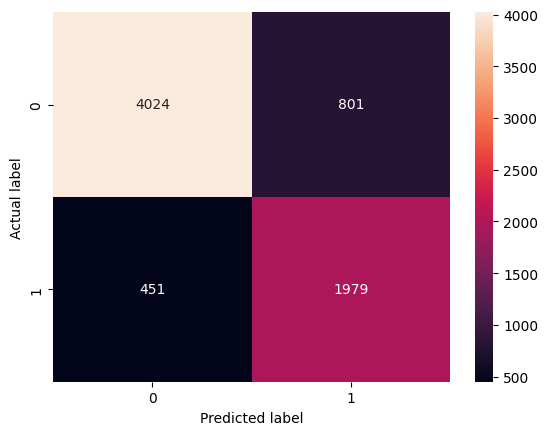

In [173]:
# Checking the confusion metrics of the test dataset using Decision Tree Classification
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Text(50.722222222222214, 0.5, 'Actual label')

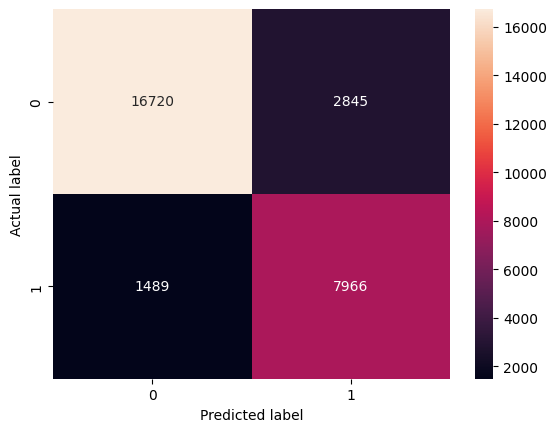

In [174]:
# Checking the confusion metrics of the trining dataset using Decision Tree Classification
cm_train = confusion_matrix(y_train, steps.predict(X_train))
sns.heatmap(cm_train, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [175]:
# Checking the accuracy score of Decision Tree Classification using the test dataset
acc_test = accuracy_score(y_test, steps.predict(X_test))
print(f"Accuracy test: {acc_test}")

# Checking the accuracy score of Decision Tree Classification using the training dataset
acc_train = accuracy_score(y_train, steps.predict(X_train))
print(f"Accuracy train: {acc_train}")

Accuracy test: 0.8274293590627154
Accuracy train: 0.8506547208821502


In [176]:
# Checking the recall score of Decision Tree Classification using the test and training dataset
print(recall_score(y_test, steps.predict(X_test)))
print(recall_score(y_train, steps.predict(X_train)))

0.81440329218107
0.8425171866737176


In [177]:
# Checking the precision score of Decision Tree Classification using the test dataset
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, steps.predict(X_test))
print(pr_auc)

0.6419137065465682


#### Cross Validation to measure performance of the model

In [178]:
# Importing module for Cross Validation
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

In [179]:
# Cross Validation Score
CV_scores = cross_val_score(steps, X, y, scoring='average_precision', cv=5, n_jobs=-1)
print(f'Cross Validation score: {CV_scores.mean()}')

Cross Validation score: 0.8726997021555221


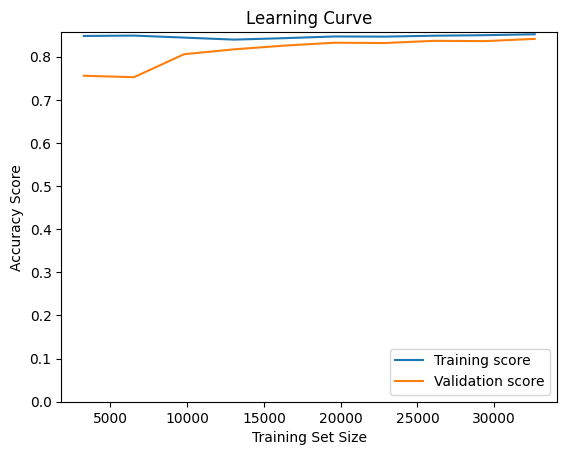

In [180]:
# Visualizing the Cross Validation score
train_sizes, train_scores, val_scores = learning_curve(steps, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10))

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.ylim(0)
plt.show()

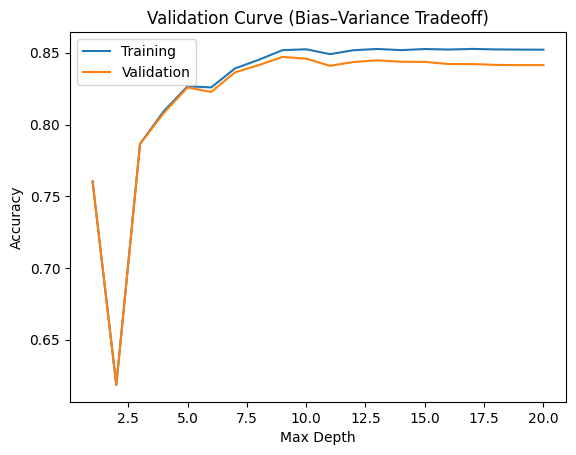

In [181]:
# Visualizing the Bias-Variance Tradeoff
param_range = range(1, 21)

train_scores, val_scores = validation_curve(steps, X, y, param_name='model__max_depth', param_range=param_range, cv=10, scoring='accuracy', n_jobs=-1)

plt.plot(param_range, train_scores.mean(axis=1), label='Training')
plt.plot(param_range, val_scores.mean(axis=1), label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve (Bias–Variance Tradeoff)')
plt.legend()
plt.show()

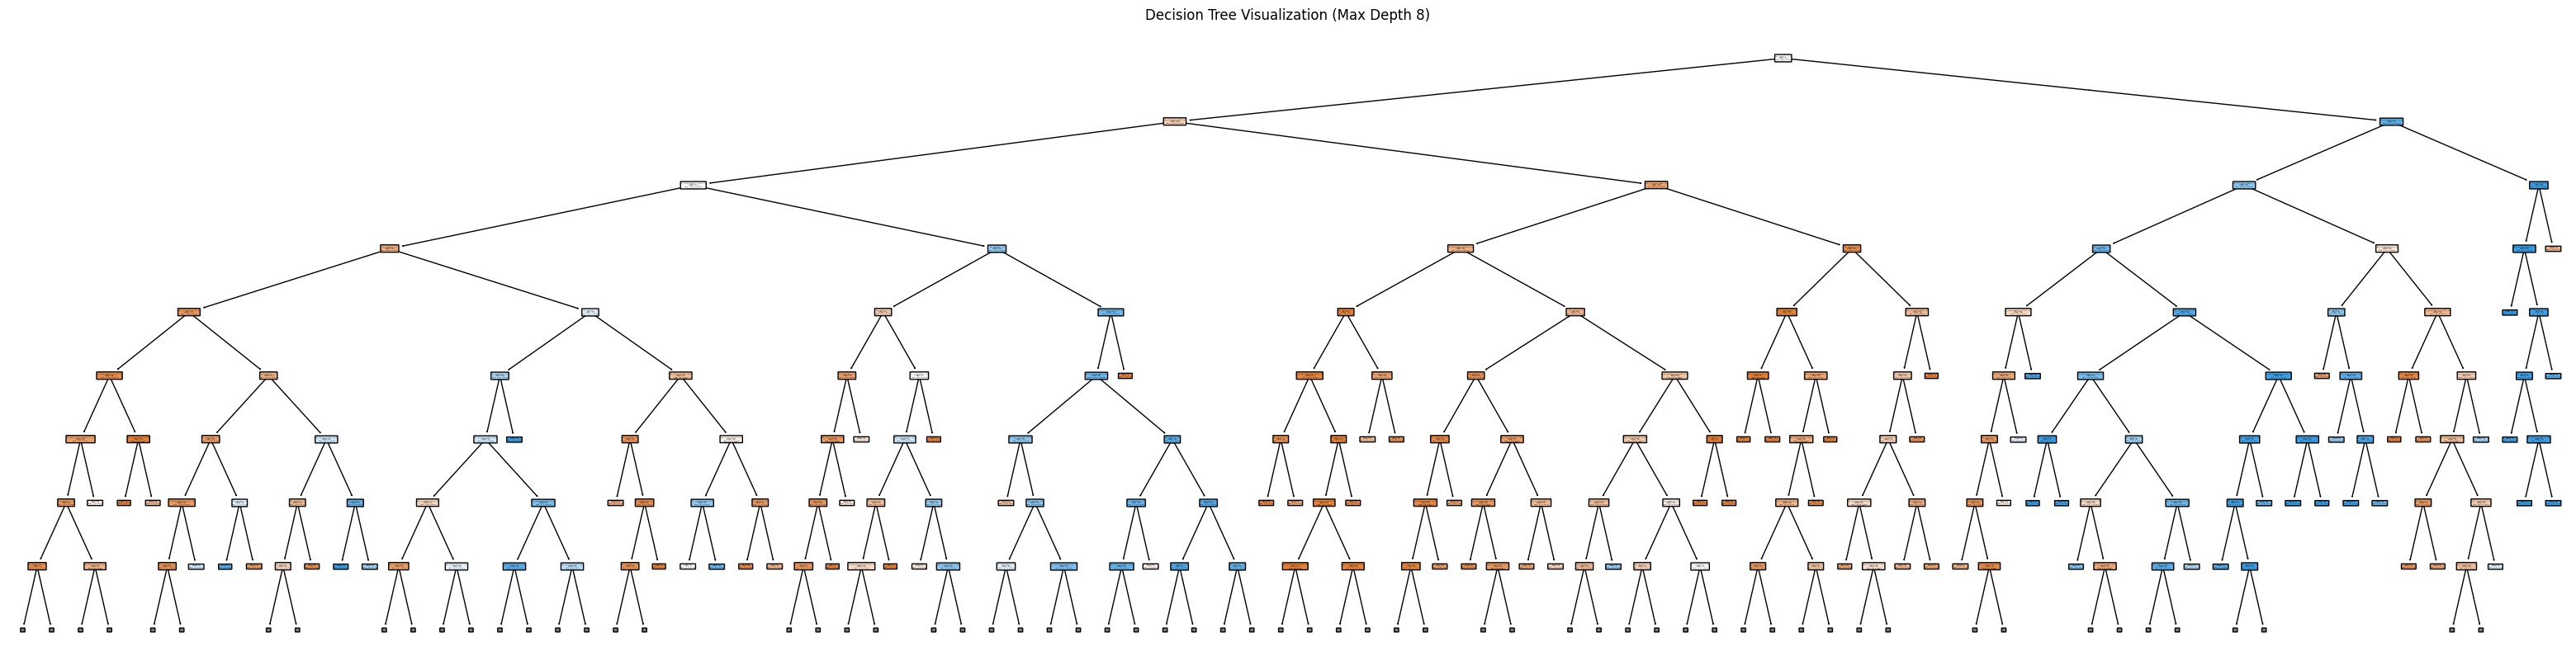

In [182]:
# visualizing the Decision Tree Classifier model
from sklearn.tree import plot_tree

plt.figure(figsize=(40,10))

features_names_after_preprocessing = steps.named_steps['preprocessor'].get_feature_names_out().tolist()

plot_tree(steps.named_steps['model'],
          feature_names=features_names_after_preprocessing,
          class_names=['Not Canceled', 'Not_Canceled'],
          filled=True,
          rounded=True,
          max_depth=8)

plt.title('Decision Tree Visualization (Max Depth 8)')
plt.show()

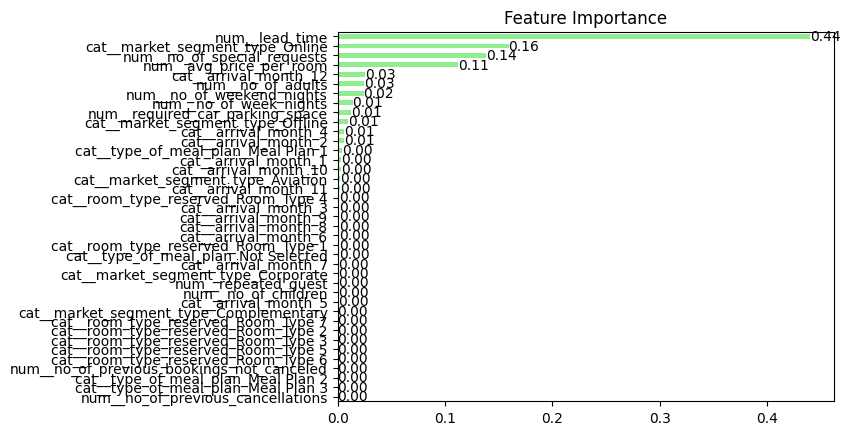

In [183]:
# Feature Importance
importances_rf = pd.Series(steps.named_steps['model'].feature_importances_, index = features_names_after_preprocessing).sort_values()
ax = importances_rf.plot(kind='barh', color='lightgreen')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Feature Importance')
plt.show()

#### Random Forest

In [184]:
# Intantiate a rondom forests classification
steps_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, min_samples_leaf=50, class_weight='balanced', random_state=20))])

steps_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type',
                                                   'arrival_month'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=50, n_estimators=200,
                                        random_state=20))])

In [185]:
# predict the test dataset using Random Forest bagging
y_pred_rf = steps_rf.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual label')

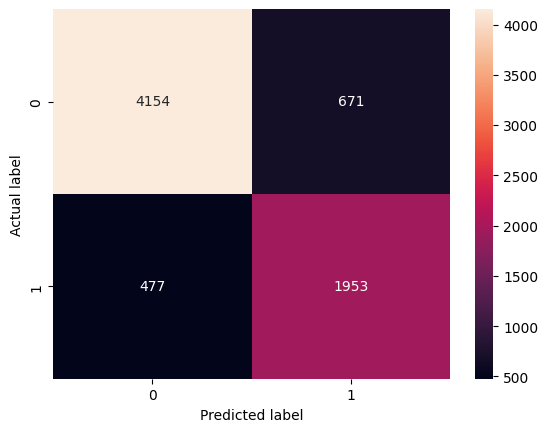

In [186]:
# Checking the confusion matrix of Random Forest using test dataset
cm_train_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_train_rf, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [187]:
# Checking the accuracy score of the Random Forest using the test dataset
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy test: {acc_test_rf}")

# Checking the accuracy score of the Random Forest using the training dataset
acc_train_rf = accuracy_score(y_train, steps_rf.predict(X_train))
print(f"Accuracy train: {acc_train_rf}")

Accuracy test: 0.8417643004824259
Accuracy train: 0.8458649207443143


In [188]:
# Checking the recall score of the Random Forest using the test and training dataset
print(recall_score(y_test, steps_rf.predict(X_test)))
print(recall_score(y_train, steps_rf.predict(X_train)))

0.8037037037037037
0.8074034902168165


In [189]:
# Cross Validation score of the Random Forest
CV_rf_scores = cross_val_score(steps_rf, X, y, scoring='average_precision', cv=10, n_jobs=-1)
print(f'Cross Validation score: {CV_rf_scores.mean()}')

Cross Validation score: 0.869498573610122


In [190]:
# PR-AUC score of the Random Forest
pr_auc_rf = average_precision_score(y_test, steps_rf.predict(X_test))
print(pr_auc_rf)

0.6639311951247527


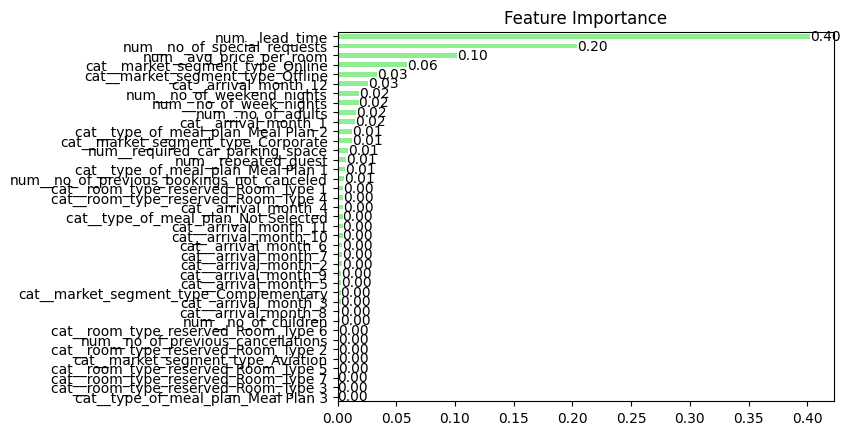

In [191]:
# Feature Importances of the Random Forest model
importances_rf = pd.Series(steps_rf.named_steps['model'].feature_importances_, index = features_names_after_preprocessing).sort_values()
ax = importances_rf.plot(kind='barh', color='lightgreen')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Feature Importance')
plt.show()

#### Gradient Boosting

In [192]:
# Importing Gradient Boosting from Scikit Learning library
from sklearn.ensemble import GradientBoostingClassifier

# Intantiate gradient boosting
steps_gbt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(n_estimators=300, max_depth=4, learning_rate=0.05, min_samples_leaf=30, subsample=0.8,random_state=20))])

steps_gbt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requ...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type',
                                                   'arrival_month'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            min_samples_leaf=30,
                                            n_estimators=300, random_state=20,
                                            subsample=0.8))])

In [193]:
# Predicting the outcome of the test dataset using Gradient Boosting
y_pred_gbt = steps_gbt.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual label')

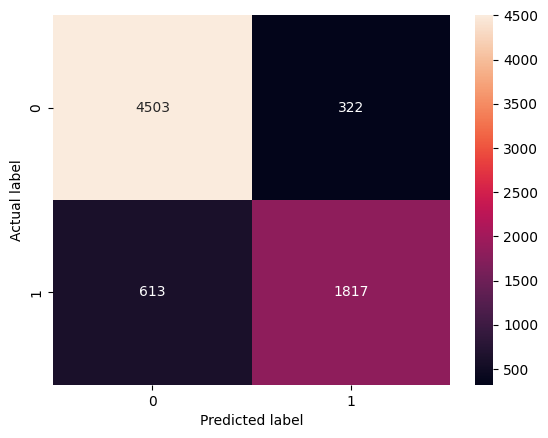

In [194]:
# Showing confusion matrix of Gradient Boosting using the test dataset
cm_train_gbt = confusion_matrix(y_test, y_pred_gbt)
sns.heatmap(cm_train_gbt, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [195]:
# Checking the accuracy score of the Gradient Boosting using the test dataset
acc_test_gbt = accuracy_score(y_test, y_pred_gbt)
print(f"Accuracy test: {acc_test_gbt}")

# Checking the accuracy score of the Gradient Boosting using the training dataset
acc_train_gbt = accuracy_score(y_train, steps_gbt.predict(X_train))
print(f"Accuracy train: {acc_train_gbt}")

Accuracy test: 0.8711233631977946
Accuracy train: 0.8797381116471399


In [196]:
# Checking the recalll score of the Gradient Boosting using the test and training dataset
print(recall_score(y_test, steps_gbt.predict(X_test)))
print(recall_score(y_train, steps_gbt.predict(X_train)))

0.7477366255144033
0.7583289264939186


In [197]:
# Checking the cross validation score of the Gradient Boosting
CV_gbt_scores = cross_val_score(steps_gbt, X, y, scoring='average_precision', cv=10, n_jobs=-1)
print(f'Cross Validation score of Gradient Boosting: {CV_gbt_scores.mean()}')

Cross Validation score of Gradient Boosting: 0.8938797125159553


In [198]:
# PR-AUC score of the Gradient Boosting
pr_auc_gbt = average_precision_score(y_test, steps_gbt.predict(X_test))
print(pr_auc_gbt)

0.7196675755399727


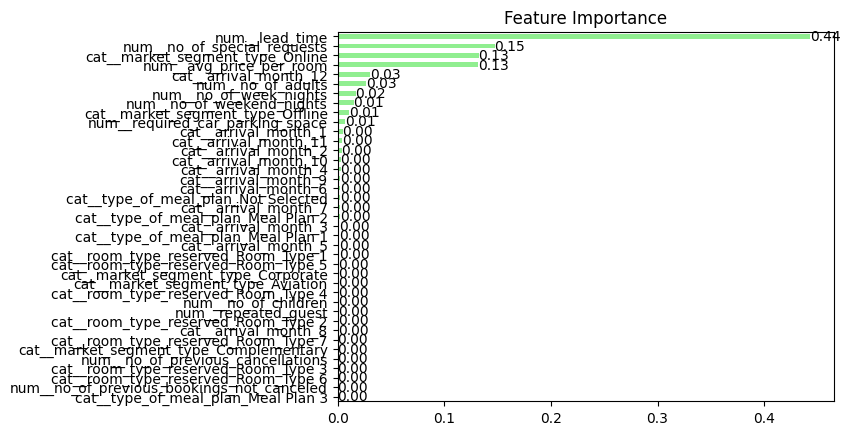

In [199]:
# Feature Importance of the Gradient Boosting
importances_rf = pd.Series(steps_gbt.named_steps['model'].feature_importances_, index = features_names_after_preprocessing).sort_values()
ax = importances_rf.plot(kind='barh', color='lightgreen')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Feature Importance')
plt.show()

#### Model Tuning using GridSearch CV

In [200]:
# Import GridSearch CV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters steps_gbt
params_gbt = {
    'model__max_depth': [3, 4],
    'model__learning_rate': [0.05, 0.1],
    'model__n_estimators': [200, 400]
}

# Instantiate a 10-fold CV grid search object steps_gbt
grid_gbt = GridSearchCV(estimator=steps_gbt,
                        param_grid=params_gbt,
                        scoring='average_precision',
                        cv=5,
                        n_jobs=-1)

In [201]:
# Fit the grid search object
grid_gbt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='constant'),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'required_car_parking_space',
                                                                          'lead_time',
                                                                          'repeated_guest',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_p...
                                                                         ['type_of_meal_plan',
                                                                          'room_type_reserved',
                                                                          'market_segment_type',
                                                                          'arrival_month'])])),
                                       ('model',
                                        GradientBoostingClassifier(learning_rate=0.05,
                                                                   max_depth=4,
                                                                   min_samples_leaf=30,
                                                                   n_estimators=300,
                                                                   random_state=20,
                                                                   subsample=0.8))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 4],
                         'model__n_estimators': [200, 400]},
             scoring='average_precision')

In [202]:
# Extract best hyperparameters from grid_gbt
best_hyperparams = grid_gbt.best_params_
print('Best hyperparameters:', best_hyperparams)

# Extract best CV score from grid_gbt
best_CV_score = grid_gbt.best_score_
print('Best CV score:', best_CV_score)

# Extract best model from grid_gbt
best_model = grid_gbt.best_estimator_
y_proba_grid = best_model.predict_proba(X_test)[:, 1]
y_pred_grid = best_model.predict(X_test)
pr_auc_grid = average_precision_score(y_test, y_proba_grid)
print('Test set PR-AUC:', pr_auc_grid)

recall_grid = recall_score(y_test, y_pred_grid)
print('Test set recall:', recall_grid)

Best hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 400}
Best CV score: 0.9089051080153961
Test set PR-AUC: 0.9094540668064468
Test set recall: 0.7695473251028807


Text(50.722222222222214, 0.5, 'Actual label')

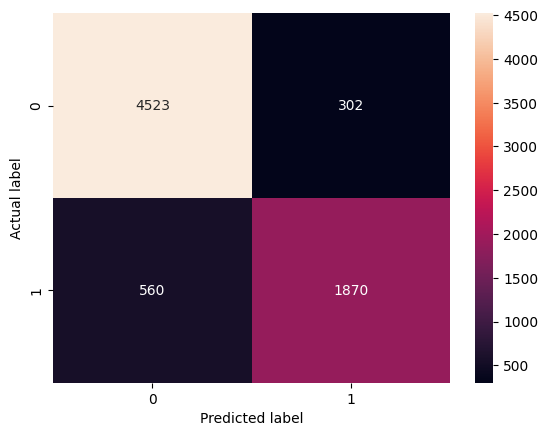

In [203]:
# Confusion matrix of the GridSearch CV of the best estimator using the test dataset
cm_train_grid_gbt = confusion_matrix(y_test, grid_gbt.best_estimator_.predict(X_test))
sns.heatmap(cm_train_grid_gbt, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [204]:
# Accuracy score of GridSearch CV using the best estimator parameter of the test and training dataset
acc_test_grid_gbt = accuracy_score(y_test, grid_gbt.best_estimator_.predict(X_test))
print(f"Accuracy test: {acc_test_grid_gbt}")

acc_train_grid_gbt = accuracy_score(y_train, grid_gbt.best_estimator_.predict(X_train))
print(f"Accuracy train: {acc_train_grid_gbt}")

Accuracy test: 0.8811853893866299
Accuracy train: 0.9001378359751895


In [205]:
# Recall score of GridSearch CV using the best estimator parameter of the test and training dataset
acc_test_grid_gbt = recall_score(y_test, grid_gbt.best_estimator_.predict(X_test))
print(f"Accuracy test: {acc_test_grid_gbt}")

acc_train_grid_gbt = recall_score(y_train, grid_gbt.best_estimator_.predict(X_train))
print(f"Accuracy train: {acc_train_grid_gbt}")

Accuracy test: 0.7695473251028807
Accuracy train: 0.7980962453728186


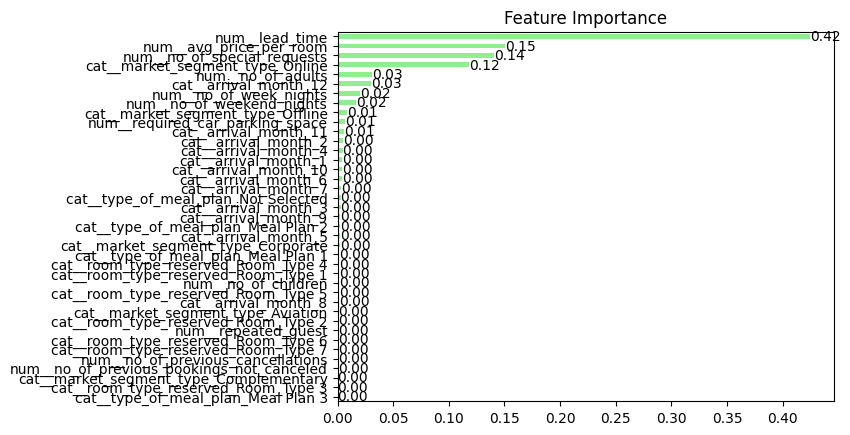

In [206]:
# Feature Importances of the GridSearch CV using the best model parameter
importances_rf = pd.Series(best_model.named_steps['model'].feature_importances_, index = features_names_after_preprocessing).sort_values()
ax = importances_rf.plot(kind='barh', color='lightgreen')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Feature Importance')
plt.show()